<h1 style="margin-bottom:0"><center>DI 504: Fundementals of Deep Learning</center></h1>
<h5 style="margin-top:0"><center>Mehmet Ali Erkan -  Experimentation Notebook</center></h3>




Here is the some code from first ipynb file that enable part 3 codes works well.

In [ ]:
# !pip install torchvision
# !pip install tqdm
import torch
import torchvision
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

path = os.getcwd()

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0, 1)
])

fmnist_train = torchvision.datasets.FashionMNIST(path, train=True, transform=transform, download=True)
fmnist_test = torchvision.datasets.FashionMNIST(path, train=False, transform=transform, download=True)

###############
from torch.utils.data import random_split
#split into train and test set
train_size = 50000
val_size = 10000

fmnist_train, fmnist_val = random_split(fmnist_train, [train_size, val_size])

# print the dimension of dataset
print(f"New training set size: \t{len(fmnist_train)}")
print(f"Validation set size: \t{len(fmnist_val)}")
print(f"Test set size: \t\t{len(fmnist_test)}")

###############

from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(fmnist_test, batch_size=batch_size, shuffle=False)

labs = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}
# #take a batch from the train set
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# print the shape and data
print(f"Shape of the inputs from the dataloader: {images.shape}")
print("And the data looks like so:")
print(images)

class ThreeLayerNetwork(torch.nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        # define layer
        self.layer1 = torch.nn.Linear(28 * 28, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, 10)

    def forward(self, x):
        # view
        x = x.view(x.size(0), -1)  # Batch size x (28x28)
        x = F.relu(self.layer1(x))  #first layer and ReLU activation function
        x = self.layer2(x)  #
        return x

# model
three_layer_net = ThreeLayerNetwork(hidden_size=500).to(device)

# Dummy data and test
dummy_input = torch.randn(16, 1, 28, 28).to(device)  # Dummy input şekli: [Batch size, Channels, Height, Width]
dummy_output = three_layer_net(dummy_input)

# Shape
print(f"Dummy input shape: {dummy_input.shape}")
print(f"Dummy output shape: {dummy_output.shape}")


def train(dataloader, model, loss, optimizer):
    losses = []
    true_positive = 0
    model.train()
    for images, labels in tqdm.tqdm(dataloader):
        images, labels = images.to(device), labels.to(device)

        class_scores = model(images)

        # calculate loss function
        train_loss = loss(class_scores, labels)

        # Gradients to zero
        optimizer.zero_grad()

        # backward and optimization steps
        train_loss.backward()
        optimizer.step()

        losses.append(train_loss.item())

        predicted_class = torch.argmax(class_scores, dim=1)

        true_positive_batch = torch.sum(predicted_class == labels)
        true_positive += true_positive_batch.item()

    accuracy = true_positive / len(dataloader.dataset)

    return losses, accuracy

def validate(dataloader, model, loss):
    losses = []
    preds = []
    actuals = []
    model.eval()  # convert model into evaulation part
    with torch.no_grad():  # do not calculate gradiemt
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # take class score from the model
            class_scores = model(images)

            # calculate loss function
            val_loss = loss(class_scores, labels)
            losses.append(val_loss.item())

            # detect the predicted limit
            predicted_class = torch.argmax(class_scores, dim=1)

            # save the predicted and actual labels
            preds.extend(predicted_class.tolist())
            actuals.extend(labels.tolist())

    return losses, preds, actuals


class ThreeLayerNetwork(torch.nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        # define layer
        self.layer1 = torch.nn.Linear(28 * 28, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, 10)

    def forward(self, x):
        # view
        x = x.view(x.size(0), -1)  # Batch size x (28x28)
        x = F.relu(self.layer1(x))  #first layer and ReLU activation function
        x = self.layer2(x)  #
        return x

# model
three_layer_net = ThreeLayerNetwork(hidden_size=500).to(device)

# Dummy data and test
dummy_input = torch.randn(16, 1, 28, 28).to(device)  # Dummy input şekli: [Batch size, Channels, Height, Width]
dummy_output = three_layer_net(dummy_input)

# Shape
print(f"Dummy input shape: {dummy_input.shape}")
print(f"Dummy output shape: {dummy_output.shape}")


def train(dataloader, model, loss, optimizer):
    losses = []
    true_positive = 0
    model.train()
    for images, labels in tqdm.tqdm(dataloader):
        images, labels = images.to(device), labels.to(device)

        class_scores = model(images)

        # calculate loss function
        train_loss = loss(class_scores, labels)

        # Gradients to zero
        optimizer.zero_grad()

        # backward and optimization steps
        train_loss.backward()
        optimizer.step()

        losses.append(train_loss.item())

        predicted_class = torch.argmax(class_scores, dim=1)

        true_positive_batch = torch.sum(predicted_class == labels)
        true_positive += true_positive_batch.item()

    accuracy = true_positive / len(dataloader.dataset)

    return losses, accuracy

def validate(dataloader, model, loss):
    losses = []
    preds = []
    actuals = []
    model.eval()  # convert model into evaulation part
    with torch.no_grad():  # do not calculate gradiemt
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # take class score from the model
            class_scores = model(images)

            # calculate loss function
            val_loss = loss(class_scores, labels)
            losses.append(val_loss.item())

            # detect the predicted limit
            predicted_class = torch.argmax(class_scores, dim=1)

            # save the predicted and actual labels
            preds.extend(predicted_class.tolist())
            actuals.extend(labels.tolist())

    return losses, preds, actuals

    # Define Adam optimizer and CrossEntropyLoss
optimizer = torch.optim.Adam(three_layer_net.parameters(), lr=0.001)
loss_function = torch.nn.CrossEntropyLoss()

epoch_nr = 5

train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

# Accuracy function
def accuracy(predictions, labels):
    correct = sum(p == l for p, l in zip(predictions, labels))
    return correct / len(labels)

# Training
for i in range(epoch_nr):

    tr_l, tr_acc = train(train_dataloader, three_layer_net, loss_function, optimizer)

    # Accuracy
    vl_l, pred, act = validate(valid_dataloader, three_layer_net, loss_function)
    val_acc = accuracy(pred, act)

    # save the predicted and actual labels
    train_loss_list.extend(tr_l)
    val_loss_list.extend(vl_l)

    train_acc_list.append(tr_acc)
    val_acc_list.append(val_acc)


    print(
        f"End of epoch {i+1} : Train loss: {np.mean(tr_l):.3f} \t Valid loss: {np.mean(vl_l):.3f} \t "
        f"Train Acc: {tr_acc*100:.2f}% \t Valid Acc: {val_acc*100:.2f}%"
    )

def plot_loss_graph(loss_list, epoch_nr=None):

    plt.style.use('default')

    plt.figure(figsize=(8, 5))
    plt.xlabel('Iterations')
    plt.ylabel('Losses')
    lengths = [len(x) for x in loss_list]
    max_length = max(lengths)
    relative_len = np.round(max_length / np.array(lengths))

    for i, j, loss in zip(lengths, relative_len, loss_list):
        if epoch_nr:
            filter_size = i // (2 * epoch_nr)
        else:
            filter_size = i // gcd(*lengths)
        moving_average_filter = [1 / filter_size] * filter_size
        loss = np.convolve(loss, moving_average_filter, 'valid')
        plt.plot(np.repeat(loss, int(max_length / len(loss))))

New training set size: 	50000
Validation set size: 	10000
Test set size: 		10000
Shape of the inputs from the dataloader: torch.Size([32, 1, 28, 28])
And the data looks like so:
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0039,  ..., 0.1098, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.000

100%|██████████| 1563/1563 [00:09<00:00, 171.81it/s]


End of epoch 1 : Train loss: 0.502 	 Valid loss: 0.375 	 Train Acc: 82.00% 	 Valid Acc: 86.70%


100%|██████████| 1563/1563 [00:08<00:00, 174.19it/s]


End of epoch 2 : Train loss: 0.373 	 Valid loss: 0.378 	 Train Acc: 86.36% 	 Valid Acc: 86.18%


100%|██████████| 1563/1563 [00:09<00:00, 172.00it/s]


End of epoch 3 : Train loss: 0.331 	 Valid loss: 0.351 	 Train Acc: 87.83% 	 Valid Acc: 87.04%


100%|██████████| 1563/1563 [00:09<00:00, 172.29it/s]


End of epoch 4 : Train loss: 0.307 	 Valid loss: 0.315 	 Train Acc: 88.68% 	 Valid Acc: 88.35%


100%|██████████| 1563/1563 [00:09<00:00, 173.36it/s]


End of epoch 5 : Train loss: 0.287 	 Valid loss: 0.300 	 Train Acc: 89.47% 	 Valid Acc: 89.20%


# Part 3: Experimentation (30 pts)

## 1) Visualizing activations

Take the weights of the three layer network and plot them such that overall activation for each class is visible in separate 28x28 grids. (Hint: Instead of activations flowing forward, think about it from a backwards manner. Matrix multiplication is a must at this step.) Comment on what shapes activations form and whether ther are similarities / differences.

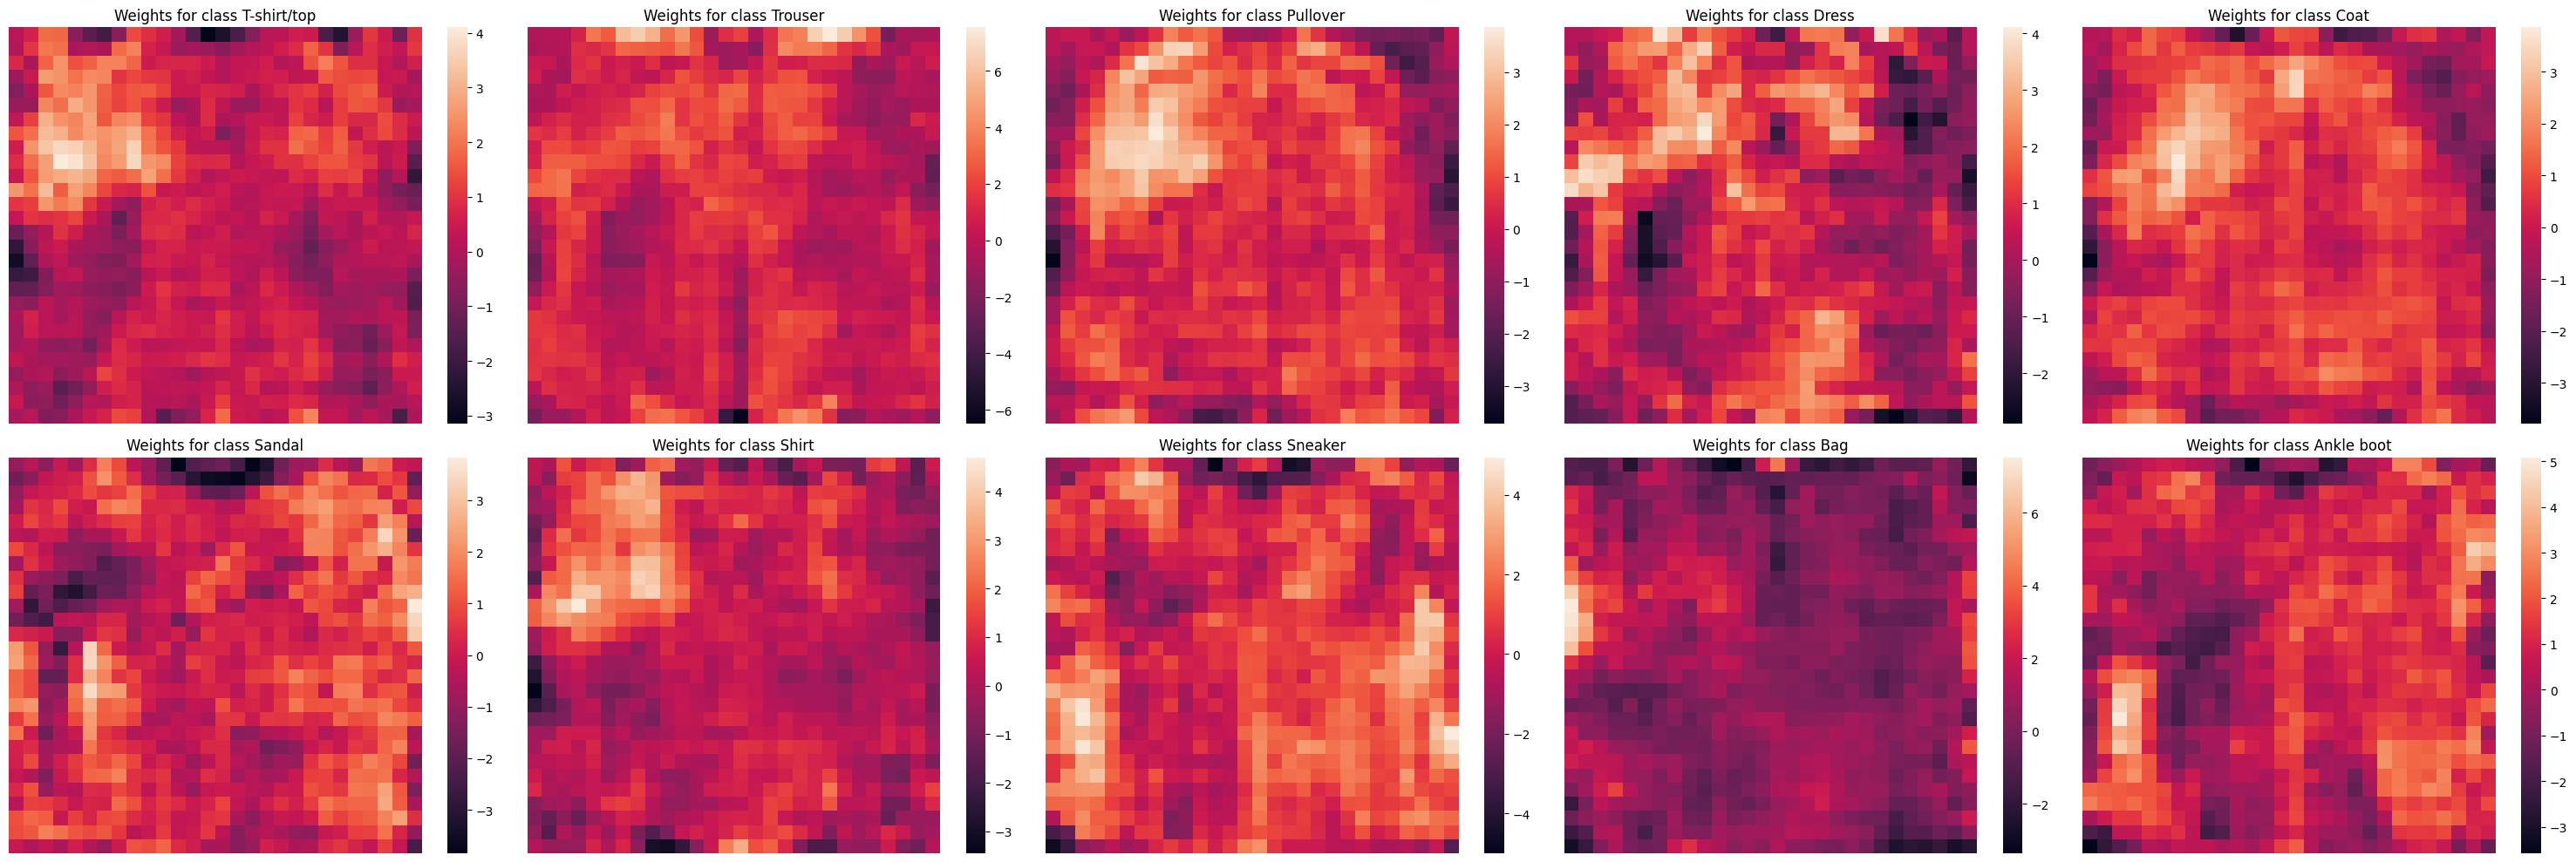

In [ ]:
# Visualizations for weights
parameters = []

# Take the parameters in the model
for param in three_layer_net.parameters():
    parameters.append(param)

#weights
input_weights = parameters[0].cpu().detach().numpy()  # (500, 784) -
output_weights = parameters[2].cpu().detach().numpy()  # (10, 500) -

# 28x28 weights
class_weights = (output_weights @ input_weights).reshape(10, 28, 28)

# Visualizations
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
for i, j in enumerate(ax.flatten()):
    sns.heatmap(class_weights[i, :, :], ax=j, cmap='rocket', cbar=True)
    j.set(xticklabels=[], yticklabels=[], ylabel=None, xlabel=None, title=f'Weights for class {labs.get(i)}')
    j.tick_params(left=False, bottom=False)
plt.tight_layout()
plt.show()


The output represents the weight activations for each class in the Fashion-MNIST dataset. Each heatmap corresponds to a specific class (e.g., T-shirt/top, Trouser, etc.), showing how the model's weights are distributed across the 28x28 input space for that class. Brighter areas indicate higher weight values, which suggest that the model finds those regions more important for identifying the respective class, while darker areas represent lower weight contributions. From these heatmaps, we observe that certain patterns emerge uniquely for each class. For instance, weights for "Trouser" and "Ankle Boot" have distinct activations concentrated in specific regions, likely corresponding to the vertical and rectangular shapes of these items. On the other hand, more ambiguous classes like "Shirt" or "Coat" have more dispersed and overlapping activations, reflecting the model's greater difficulty in distinguishing these categories.

## 2) Different hyperparameters

Try two different values for each of the following hyperparameters (one at a time) and observe the loss graph, final accuracy and weight activations:

* Hidden layer dimension
* Learning rate
* Batch size
* Criterion
* Optimizer

**Explain what effect each change had on the model's ability to learn. Refer to obtained results.**

**Experiments should be run on a separate .ipynb file, and the findings can be explained there.**

Here is the part that I tried two different values for, hidden layer dimensions, learning rate, batch size, criterion and optimizer. For the each hyperparameters. I try to explan the best models for each hyperparamaters change and try to show all the loss graph and final accuracy graphs. End of this notebook, I summarized to interpret the general hyperparameter effects and try to choose best model.

In [ ]:
# New model definition
class ThreeLayerNetwork(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_dim, hidden_dim)
        self.layer2 = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Change hyperparameter
def run_experiment(hidden_dim=500, learning_rate=0.001, batch_size=32, optimizer_type='adam', criterion_type='cross_entropy'):
    # Define a model
    model = ThreeLayerNetwork(28 * 28, hidden_dim, 10).to(device)

    # Criterion
    if criterion_type == 'cross_entropy':
        criterion = torch.nn.CrossEntropyLoss()
    elif criterion_type == 'mse':
        criterion = torch.nn.MSELoss()
    else:
        raise ValueError("Unsupported criterion type")

    # Optimizer
    if optimizer_type == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'rmsprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # DataLoader
    train_dataloader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
    valid_dataloader = DataLoader(fmnist_val, batch_size=batch_size, shuffle=False)

    # Training
    for epoch in range(5):  # 5 epoch
        train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
        val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
        val_acc = accuracy(val_preds, val_actuals)

        print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


##HIDDEN LAYER DIMENSION

Running Experiment with Hidden Layer Dimension = 200


100%|██████████| 1563/1563 [00:08<00:00, 174.62it/s]


Epoch 1 - Train Loss: 0.5216, Val Loss: 0.4087, Train Acc: 0.8149, Val Acc: 0.8579


100%|██████████| 1563/1563 [00:08<00:00, 176.88it/s]


Epoch 2 - Train Loss: 0.3865, Val Loss: 0.3804, Train Acc: 0.8590, Val Acc: 0.8577


100%|██████████| 1563/1563 [00:09<00:00, 172.71it/s]


Epoch 3 - Train Loss: 0.3462, Val Loss: 0.3418, Train Acc: 0.8732, Val Acc: 0.8742


100%|██████████| 1563/1563 [00:09<00:00, 168.90it/s]


Epoch 4 - Train Loss: 0.3179, Val Loss: 0.3322, Train Acc: 0.8831, Val Acc: 0.8795


100%|██████████| 1563/1563 [00:09<00:00, 166.68it/s]


Epoch 5 - Train Loss: 0.2994, Val Loss: 0.3559, Train Acc: 0.8908, Val Acc: 0.8733


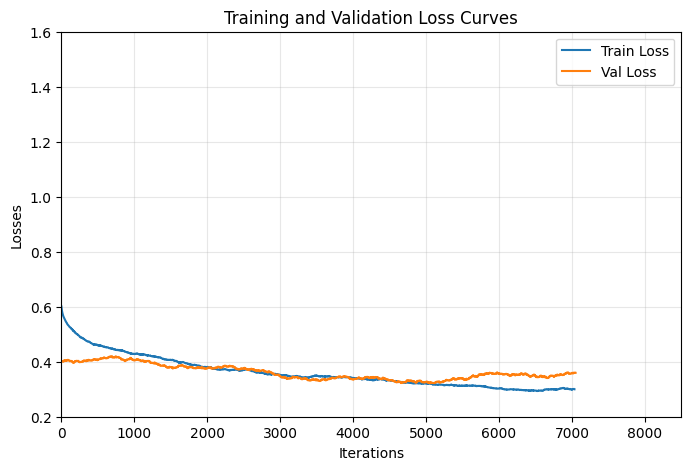

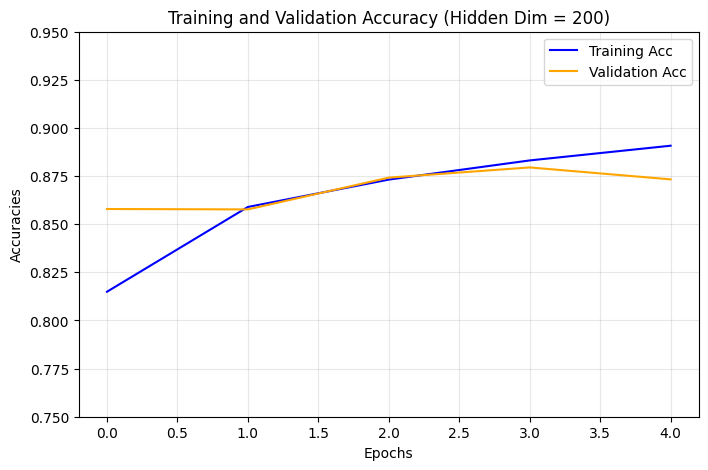

In [ ]:
# Hidden Layer Dimension 200
hidden_dim = 200

# Model
model = ThreeLayerNetwork(28 * 28, hidden_dim, 10).to(device)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=32, shuffle=False)

# Training
print(f"Running Experiment with Hidden Layer Dimension = {hidden_dim}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)

plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Hidden Dim = {hidden_dim})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()


Running Experiment with Hidden Layer Dimension = 1000


100%|██████████| 1563/1563 [00:32<00:00, 47.64it/s]


Epoch 1 - Train Loss: 0.4882, Val Loss: 0.4000, Train Acc: 0.8238, Val Acc: 0.8601


100%|██████████| 1563/1563 [00:35<00:00, 43.88it/s]


Epoch 2 - Train Loss: 0.3659, Val Loss: 0.3673, Train Acc: 0.8664, Val Acc: 0.8648


100%|██████████| 1563/1563 [00:36<00:00, 42.97it/s]


Epoch 3 - Train Loss: 0.3297, Val Loss: 0.3665, Train Acc: 0.8777, Val Acc: 0.8647


100%|██████████| 1563/1563 [00:37<00:00, 42.16it/s]


Epoch 4 - Train Loss: 0.3075, Val Loss: 0.3314, Train Acc: 0.8861, Val Acc: 0.8841


100%|██████████| 1563/1563 [00:37<00:00, 41.52it/s]


Epoch 5 - Train Loss: 0.2834, Val Loss: 0.3429, Train Acc: 0.8944, Val Acc: 0.8753


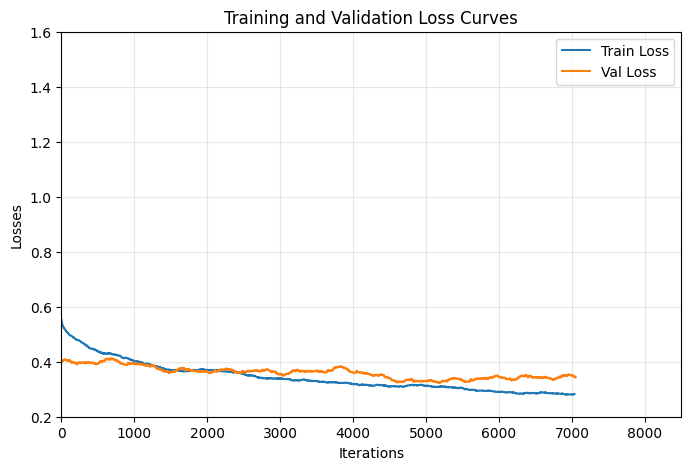

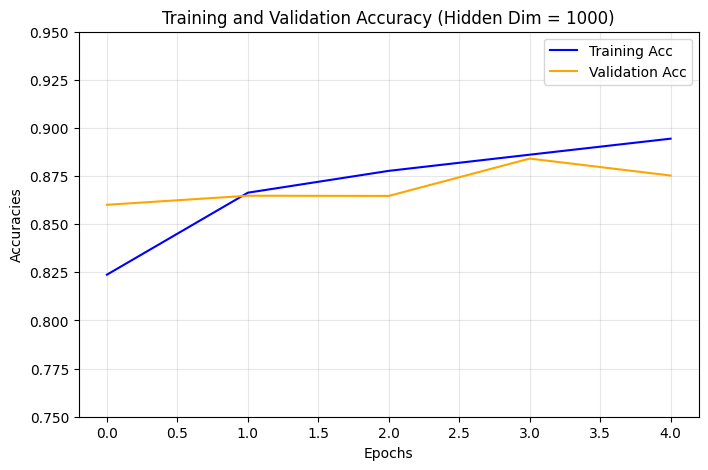

In [ ]:
#Now let's increase the hidden layer dimension

# Hidden Layer Dimension 1000
hidden_dim = 1000


model = ThreeLayerNetwork(28 * 28, hidden_dim, 10).to(device)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=32, shuffle=False)

# Training
print(f"Running Experiment with Hidden Layer Dimension = {hidden_dim}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)


plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Hidden Dim = {hidden_dim})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()



A larger hidden dimension (1000) allows the model to capture more complexity in the training data, leading to a marginally lower training loss and higher training accuracy. Moreover, The smaller hidden dimension (200) leads to better generalization, as shown by the smaller gap between training and validation loss/accuracy. With hidden_dim=1000, the model shows mild overfitting as it learns the training data slightly better but struggles to generalize as effectively on unseen validation data.

Models with a larger hidden layer size (1000) require more computational resources of courese and training time, but the performance gains on the training set are not substantial compared to the smaller model (200).

If generalization is the priority (e.g., for unseen data), The smaller hidden dimension  is a better choice, as it balances training and validation performance effectively. If fitting the training data is the priority, The larger hidden dimension (hidden_dim=1000) may be preferred, especially if you have sufficient computational resources and wish to reduce training loss.

##LEARNING RATE

Running Experiment with Learning Rate = 0.01


100%|██████████| 1563/1563 [00:29<00:00, 52.47it/s]


Epoch 1 - Train Loss: 0.5348, Val Loss: 0.4719, Train Acc: 0.8107, Val Acc: 0.8389


100%|██████████| 1563/1563 [00:34<00:00, 45.34it/s]


Epoch 2 - Train Loss: 0.4314, Val Loss: 0.4526, Train Acc: 0.8463, Val Acc: 0.8491


100%|██████████| 1563/1563 [00:33<00:00, 46.39it/s]


Epoch 3 - Train Loss: 0.4084, Val Loss: 0.4175, Train Acc: 0.8536, Val Acc: 0.8577


100%|██████████| 1563/1563 [00:34<00:00, 45.01it/s]


Epoch 4 - Train Loss: 0.3966, Val Loss: 0.4305, Train Acc: 0.8559, Val Acc: 0.8540


100%|██████████| 1563/1563 [00:33<00:00, 46.56it/s]


Epoch 5 - Train Loss: 0.3849, Val Loss: 0.4216, Train Acc: 0.8608, Val Acc: 0.8599


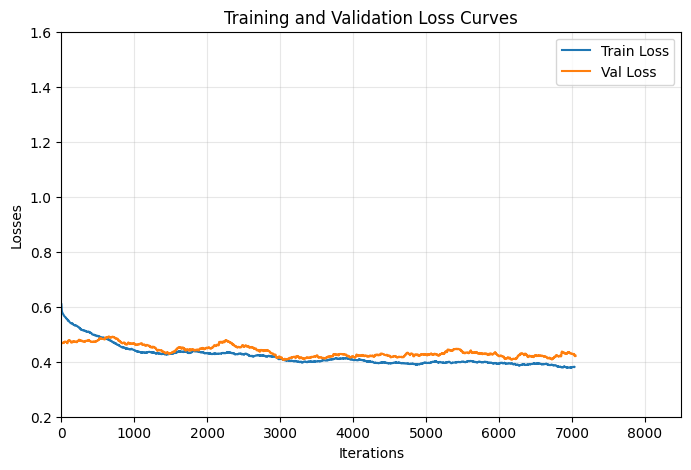

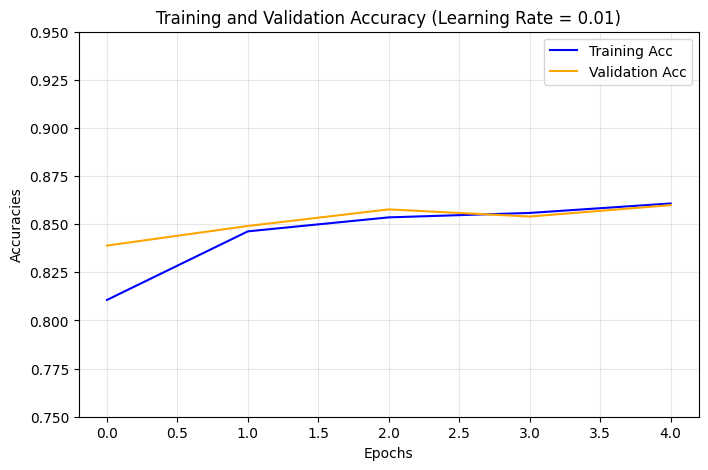

In [ ]:
##LEARNING RATE CHANGE
#LET'S START WITH A TWO DIFFERENT LEARNING RATE WHICH IS RESPECTIVELY O.O1 AND O.OOO1


# Learning Rate = 0.01
learning_rate = 0.01

# Model
model = ThreeLayerNetwork(28 * 28, 500, 10).to(device)  # Hidden dim = 500 (AS BEFORE)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=32, shuffle=False)

# TRAINING
print(f"Running Experiment with Learning Rate = {learning_rate}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)


plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Learning Rate = {learning_rate})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()


Running Experiment with Learning Rate = 0.0001


100%|██████████| 1563/1563 [00:23<00:00, 65.36it/s]


Epoch 1 - Train Loss: 0.6924, Val Loss: 0.5018, Train Acc: 0.7746, Val Acc: 0.8312


100%|██████████| 1563/1563 [00:23<00:00, 65.39it/s]


Epoch 2 - Train Loss: 0.4618, Val Loss: 0.4376, Train Acc: 0.8416, Val Acc: 0.8519


100%|██████████| 1563/1563 [00:24<00:00, 64.72it/s]


Epoch 3 - Train Loss: 0.4172, Val Loss: 0.4236, Train Acc: 0.8544, Val Acc: 0.8552


100%|██████████| 1563/1563 [00:24<00:00, 64.50it/s]


Epoch 4 - Train Loss: 0.3913, Val Loss: 0.3923, Train Acc: 0.8649, Val Acc: 0.8642


100%|██████████| 1563/1563 [00:23<00:00, 65.44it/s]


Epoch 5 - Train Loss: 0.3697, Val Loss: 0.3911, Train Acc: 0.8705, Val Acc: 0.8688


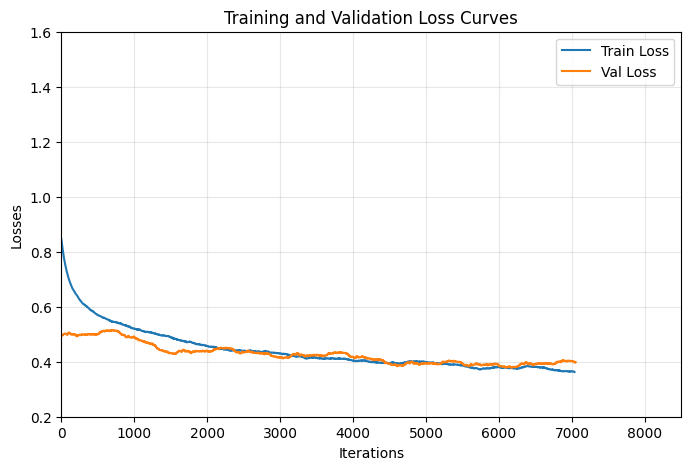

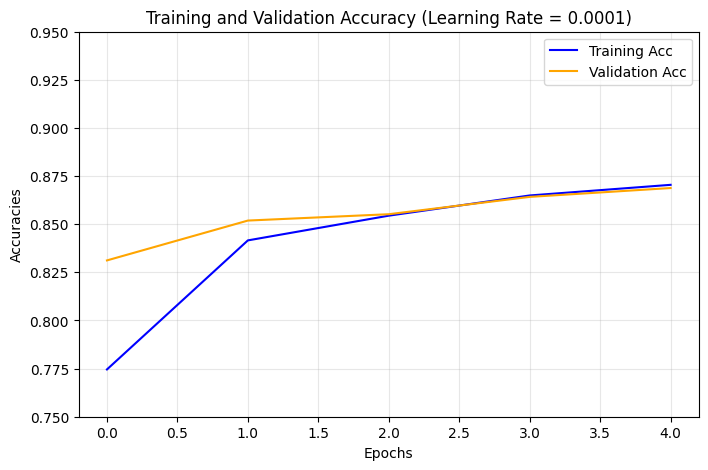

In [ ]:
# Learning Rate = 0.0001
learning_rate = 0.0001

# Model
model = ThreeLayerNetwork(28 * 28, 500, 10).to(device)  # Hidden dim = 500 (as before)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=32, shuffle=False)

# Training
print(f"Running Experiment with Learning Rate = {learning_rate}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)


plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Learning Rate = {learning_rate})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()




In the Learning Rate = 0.01. Loss curves converge faster, indicating quicker learning, but the validation loss fluctuates slightly, suggesting a risk of instability. On the other hand, In the learning Rate = 0.0001, Loss curves converge more slowly but steadily, reflecting stable and gradual learning without noticeable fluctuations. The higher learning rate (0.01) enables the model to learn faster, with training and validation losses stabilizing more quickly. However, the faster convergence introduces a slight risk of instability and overfitting, as seen in the marginally higher validation loss.
The lower learning rate (0.0001) ensures stable and gradual learning, resulting in smoother loss curves. While the model learns more slowly, it demonstrates comparable validation accuracy, suggesting better generalization capability over time. If quick learning is a priority, a higher learning rate (0.01) is suitable. However, if stability and generalization are preferred, a lower learning rate (0.0001) is the better choice, especially for larger datasets or extended training epochs,i.e more than 5 epoch.


##BATCH SIZE
Generally, smaller batch size results in more frequent weight updates and potentially better generalization. However, learning can be noisy. Larger batch size results in more stable learning and can be more hardware efficient. However, generalization risk may be reduced.


Running Experiment with Batch Size = 16


100%|██████████| 3125/3125 [00:37<00:00, 82.58it/s]


Epoch 1 - Train Loss: 0.4916, Val Loss: 0.4152, Train Acc: 0.8213, Val Acc: 0.8523


100%|██████████| 3125/3125 [00:38<00:00, 80.15it/s]


Epoch 2 - Train Loss: 0.3684, Val Loss: 0.3433, Train Acc: 0.8658, Val Acc: 0.8763


100%|██████████| 3125/3125 [00:40<00:00, 77.35it/s]


Epoch 3 - Train Loss: 0.3290, Val Loss: 0.3685, Train Acc: 0.8792, Val Acc: 0.8686


100%|██████████| 3125/3125 [00:40<00:00, 76.92it/s]


Epoch 4 - Train Loss: 0.3071, Val Loss: 0.3390, Train Acc: 0.8876, Val Acc: 0.8770


100%|██████████| 3125/3125 [00:41<00:00, 74.61it/s]


Epoch 5 - Train Loss: 0.2885, Val Loss: 0.3233, Train Acc: 0.8913, Val Acc: 0.8895


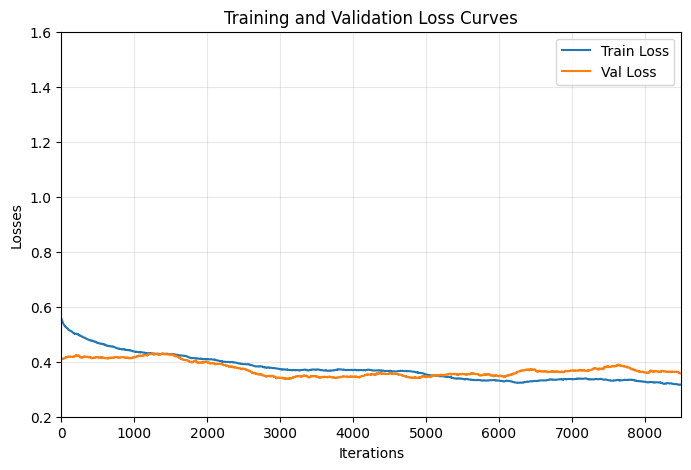

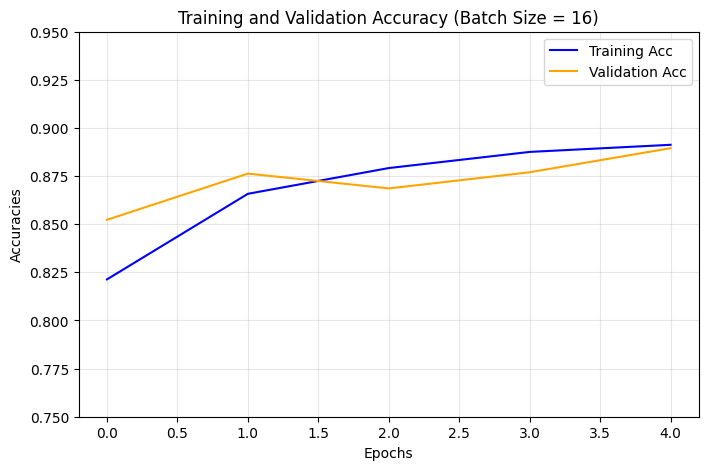

In [ ]:
# Start with batch size 16
batch_size = 16

# Model
model = ThreeLayerNetwork(28 * 28, 500, 10).to(device)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # learning rate is 0.001

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=batch_size, shuffle=False)

# Training
print(f"Running Experiment with Batch Size = {batch_size}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)


plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Batch Size = {batch_size})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()


Running Experiment with Batch Size = 128


100%|██████████| 391/391 [00:21<00:00, 18.54it/s]


Epoch 1 - Train Loss: 0.5548, Val Loss: 0.4239, Train Acc: 0.8059, Val Acc: 0.8564


100%|██████████| 391/391 [00:17<00:00, 22.47it/s]


Epoch 2 - Train Loss: 0.3968, Val Loss: 0.3790, Train Acc: 0.8583, Val Acc: 0.8646


100%|██████████| 391/391 [00:17<00:00, 22.39it/s]


Epoch 3 - Train Loss: 0.3506, Val Loss: 0.3840, Train Acc: 0.8728, Val Acc: 0.8621


100%|██████████| 391/391 [00:17<00:00, 22.23it/s]


Epoch 4 - Train Loss: 0.3230, Val Loss: 0.3416, Train Acc: 0.8822, Val Acc: 0.8813


100%|██████████| 391/391 [00:17<00:00, 21.91it/s]


Epoch 5 - Train Loss: 0.3016, Val Loss: 0.3397, Train Acc: 0.8893, Val Acc: 0.8825


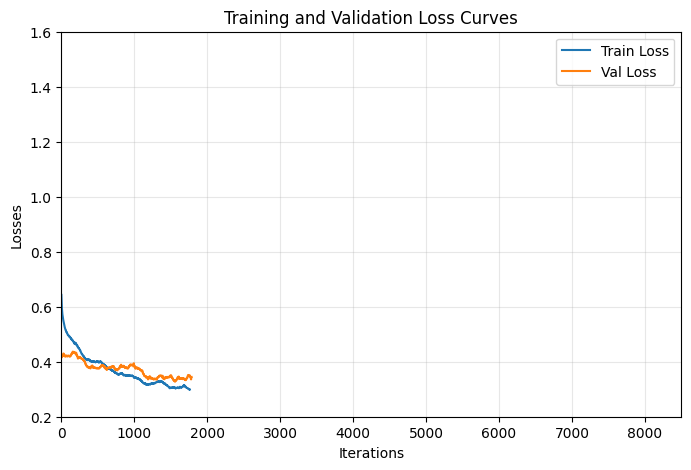

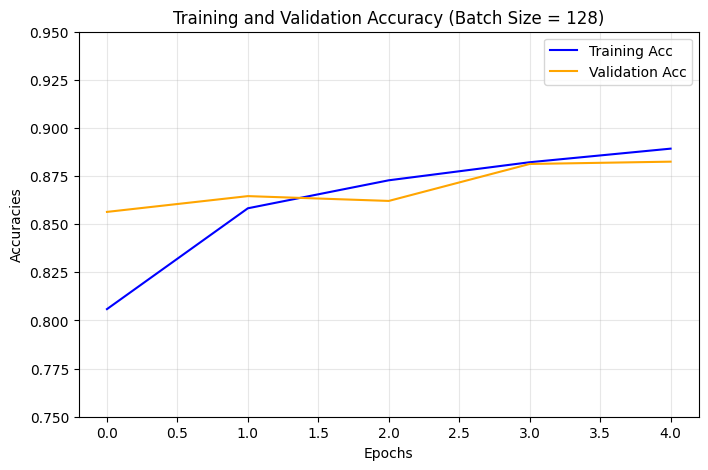

In [ ]:
# Batch Size 128
batch_size = 128

# Model
model = ThreeLayerNetwork(28 * 28, 500, 10).to(device)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # learning rate stay same.

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=batch_size, shuffle=False)

# Training
print(f"Running Experiment with Batch Size = {batch_size}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)

plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Batch Size = {batch_size})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()


For the batch size 16. The loss curves are smoother but slightly noisier, indicating more frequent updates during training. This is expected with a smaller batch size, as the model adjusts weights more often. For the 128,
the loss curves are much smoother, reflecting the stability that comes with larger batch sizes. However, the convergence speed is slightly slower compared to the smaller batch size. The smaller batch size yields a slight improvement in validation accuracy, which might indicate better generalization.
The larger batch size provides nearly identical results in terms of training and validation accuracy, demonstrating its stability and efficiency.
The smaller batch size (16) shows slightly better generalization, as indicated by its slightly higher validation accuracy. This aligns with the expectation that smaller batch sizes introduce some variability that may help prevent overfitting. In conclusion, batch Size 16 is suitable when better generalization and slightly improved validation performance are desired, but it may require more computation time due to frequent updates.
For the 128,ideal for stability and computational efficiency, especially for larger datasets or when computational resources are limited.

Lastly, you can ask that, why did the Loss Graph Look Shorter for Batch Size 128
This is likely due to fewer iterations per epoch caused by the larger batch size. With a batch size of 128, there are fewer iterations in each epoch compared to batch size 16. As a result, the x-axis (iterations) is shorter for the larger batch size.

##CRITERION

First, I tried to CrossEntropyLoss (Default), A standard choice for classification tasks, it maps the model's output directly to the class probabilities. Then, MSELoss (Mean Squared Error), Typically used for regression, but can also be used in classification. However, it typically introduces more confusion between classes.


Running Experiment with Criterion = cross_entropy


100%|██████████| 1563/1563 [00:09<00:00, 167.65it/s]


Epoch 1 - Train Loss: 0.5025, Val Loss: 0.3833, Train Acc: 0.8222, Val Acc: 0.8620


100%|██████████| 1563/1563 [00:10<00:00, 153.44it/s]


Epoch 2 - Train Loss: 0.3751, Val Loss: 0.3536, Train Acc: 0.8638, Val Acc: 0.8734


100%|██████████| 1563/1563 [00:10<00:00, 152.50it/s]


Epoch 3 - Train Loss: 0.3342, Val Loss: 0.3538, Train Acc: 0.8774, Val Acc: 0.8684


100%|██████████| 1563/1563 [00:09<00:00, 162.77it/s]


Epoch 4 - Train Loss: 0.3078, Val Loss: 0.3120, Train Acc: 0.8863, Val Acc: 0.8877


100%|██████████| 1563/1563 [00:09<00:00, 168.25it/s]


Epoch 5 - Train Loss: 0.2891, Val Loss: 0.3037, Train Acc: 0.8920, Val Acc: 0.8888


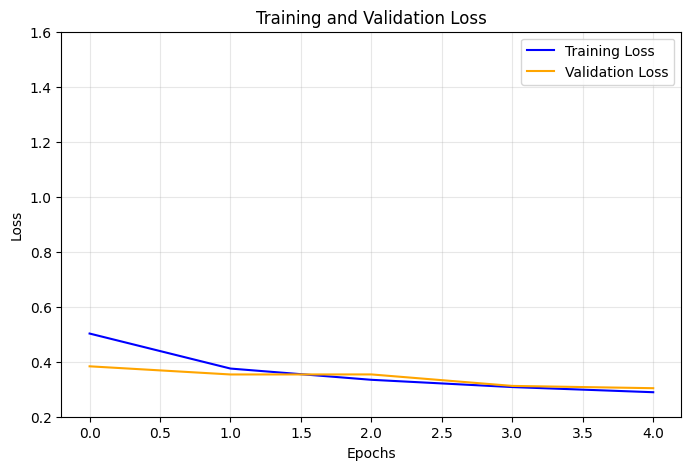

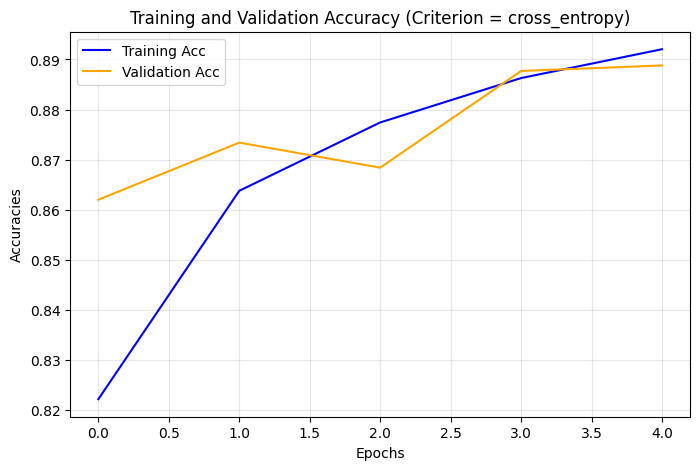

In [ ]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# CrossEntropyLoss
criterion_type = 'cross_entropy'
model = ThreeLayerNetwork(28 * 28, 500, 10).to(device)

# Criterion and optimizer
if criterion_type == 'cross_entropy':
    criterion = torch.nn.CrossEntropyLoss()
elif criterion_type == 'mse':
    criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # learning rate

train_dataloader = DataLoader(fmnist_train, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=32, shuffle=False)

# accuracy function
def accuracy(preds, targets):
    if isinstance(preds, list):  # Convert list to tensor if necessary
        preds = torch.cat(preds)
    _, predicted_labels = torch.max(preds, dim=1)  # Get the class indices with max probability
    correct = (predicted_labels == targets).sum().item()
    total = targets.size(0)
    return correct / total

def validate(dataloader, model, criterion):
    model.eval()
    val_loss = []
    val_preds = []
    val_actuals = []
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss.append(loss.item())
            val_preds.append(outputs)  # Collect predictions
            val_actuals.append(targets)  # Collect actual labels
    val_preds = torch.cat(val_preds)  # Concatenate all batch predictions
    val_actuals = torch.cat(val_actuals)  # Concatenate all batch targets
    return val_loss, val_preds, val_actuals



# Training
print(f"Running Experiment with Criterion = {criterion_type}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epochs
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    # Store mean losses
    train_loss_list.append(np.mean(train_loss))
    val_loss_list.append(np.mean(val_loss))
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


def plot_loss_graph(loss_lists, epoch_nr):
    plt.figure(figsize=(8, 5))
    plt.plot(range(epoch_nr), loss_lists[0], label='Training Loss', color='blue', linestyle='-')
    plt.plot(range(epoch_nr), loss_lists[1], label='Validation Loss', color='orange', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0.2, 1.6)  # Set y-axis limits
    plt.title('Training and Validation Loss')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.show()


plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)

#Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Criterion = {criterion_type})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

Running Experiment with MSELoss


100%|██████████| 1563/1563 [00:09<00:00, 171.21it/s]


Epoch 1 - Train Loss: 0.0182, Val Loss: 0.0211, Train Acc: 0.8983, Val Acc: 0.8789


100%|██████████| 1563/1563 [00:09<00:00, 168.90it/s]


Epoch 2 - Train Loss: 0.0180, Val Loss: 0.0206, Train Acc: 0.9018, Val Acc: 0.8831


100%|██████████| 1563/1563 [00:09<00:00, 169.97it/s]


Epoch 3 - Train Loss: 0.0178, Val Loss: 0.0209, Train Acc: 0.9025, Val Acc: 0.8803


100%|██████████| 1563/1563 [00:09<00:00, 170.75it/s]


Epoch 4 - Train Loss: 0.0176, Val Loss: 0.0199, Train Acc: 0.9044, Val Acc: 0.8857


100%|██████████| 1563/1563 [00:09<00:00, 170.54it/s]


Epoch 5 - Train Loss: 0.0174, Val Loss: 0.0206, Train Acc: 0.9057, Val Acc: 0.8839


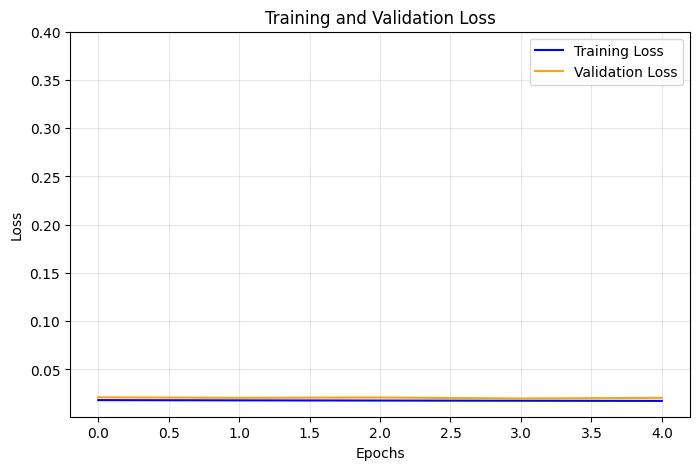

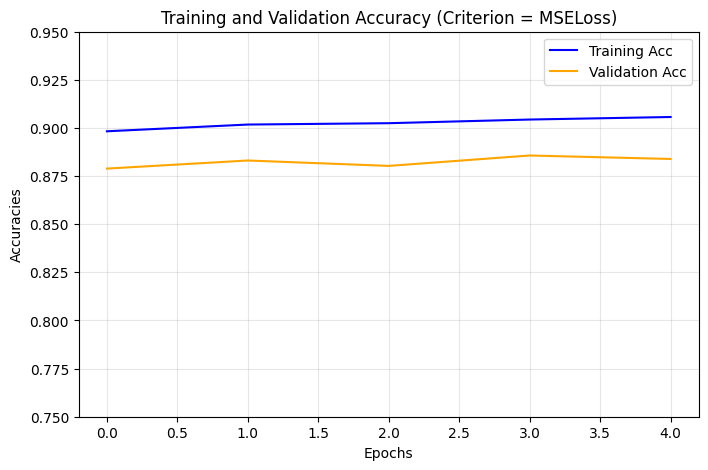

In [ ]:
# One-hot encoding for MSELoss
def one_hot_encoding(labels, num_classes):
    return torch.eye(num_classes)[labels].to(labels.device)

# Train function for MSELoss
def train_mse(dataloader, model, loss, optimizer, num_classes=10):
    losses = []
    true_positive = 0
    model.train()
    for images, labels in tqdm.tqdm(dataloader):
        images, labels = images.to(device), labels.to(device)

        labels_one_hot = one_hot_encoding(labels, num_classes)

        # Forward pass
        class_scores = model(images)
        train_loss = loss(class_scores, labels_one_hot)

        # Backward pass
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        losses.append(train_loss.item())

        # accuracy
        predicted_class = torch.argmax(class_scores, dim=1)
        true_positive_batch = torch.sum(predicted_class == labels)
        true_positive += true_positive_batch.item()

    accuracy = true_positive / len(dataloader.dataset)

    return losses, accuracy

# Validation function for MSELoss
def validate_mse(dataloader, model, loss, num_classes=10):
    losses = []
    preds = []
    actuals = []
    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # One-hot encode the targets
            labels_one_hot = one_hot_encoding(labels, num_classes)

            class_scores = model(images)
            val_loss = loss(class_scores, labels_one_hot)
            losses.append(val_loss.item())

            predicted_class = torch.argmax(class_scores, dim=1)
            preds.append(predicted_class)  # Keep as tensors
            actuals.append(labels)        # Keep as tensors

    # Concatenate predictions and actual labels
    preds = torch.cat(preds)
    actuals = torch.cat(actuals)
    return losses, preds, actuals


# MSELoss
criterion = torch.nn.MSELoss()

# Training loop
print("Running Experiment with MSELoss")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []


def accuracy(preds, targets):
    correct = (preds == targets).sum().item()
    total = targets.size(0)
    return correct / total

for epoch in range(5):
    train_loss, train_acc = train_mse(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate_mse(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    # Store mean losses
    train_loss_list.append(np.mean(train_loss))
    val_loss_list.append(np.mean(val_loss))
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

# Loss plot
def plot_loss_graph(loss_lists, epoch_nr):
    plt.figure(figsize=(8, 5))
    plt.plot(range(epoch_nr), loss_lists[0], label='Training Loss', color='blue', linestyle='-')
    plt.plot(range(epoch_nr), loss_lists[1], label='Validation Loss', color='orange', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0.001, 0.4)  # Set y-axis limits for losses
    plt.title('Training and Validation Loss')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.show()
plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title("Training and Validation Accuracy (Criterion = MSELoss)")
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)  # Set y-axis limits for accuracies
plt.show()



The loss starts higher and decreases steadily over epochs.By the final epoch, both training and validation losses converge and stabilize, indicating the model is fitting the data well without significant overfitting.
On the otherhand, MSELoss The loss starts very low and remains almost flat throughout the training process. This suggests that the MSELoss is not providing enough gradient signal to further refine the model’s predictions, possibly due to its unsuitability for classification tasks.
Moreover, The training and validation accuracies start at ~82% and ~85%, respectively, and steadily improve over epochs. By the final epoch, both training and validation accuracies are close, showing consistent improvement and good generalization. Moreover, for the MSELoss training and validation accuracies start higher and show only marginal improvement throughout training. The final training accuracy is ~92%, but the validation accuracy stagnates around ~87%, indicating potential overfitting or lack of effective learning.

The loss values for MSELoss are much smaller than for CrossEntropyLoss due to the squared error metric, which makes it harder to interpret progress.
CrossEntropyLoss provides a more interpretable loss scale and directly maps to class probabilities.

Thus, it is more suitable, as it provides a direct probabilistic interpretation and ensures better learning dynamics.

##OPTIMIZER

For the OPTIMIZER part, first I'm going to try to Adam (Adaptive Moment Estimation) which provides fast and stable optimization; usually preferred by default. Moreover, I also try SGD (Stochastic Gradient Descent) which is a simpler optimization method, but can be effective when the right learning rate is chosen.

Running Experiment with Optimizer = adam


100%|██████████| 1563/1563 [00:34<00:00, 45.51it/s]


Epoch 1 - Train Loss: 0.4994, Val Loss: 0.3980, Train Acc: 0.8197, Val Acc: 0.8591


100%|██████████| 1563/1563 [00:29<00:00, 53.75it/s]


Epoch 2 - Train Loss: 0.3716, Val Loss: 0.3685, Train Acc: 0.8643, Val Acc: 0.8681


100%|██████████| 1563/1563 [00:26<00:00, 58.60it/s]


Epoch 3 - Train Loss: 0.3307, Val Loss: 0.3574, Train Acc: 0.8773, Val Acc: 0.8771


100%|██████████| 1563/1563 [00:26<00:00, 58.55it/s]


Epoch 4 - Train Loss: 0.3049, Val Loss: 0.3261, Train Acc: 0.8880, Val Acc: 0.8845


100%|██████████| 1563/1563 [00:26<00:00, 58.17it/s]


Epoch 5 - Train Loss: 0.2889, Val Loss: 0.3389, Train Acc: 0.8939, Val Acc: 0.8780


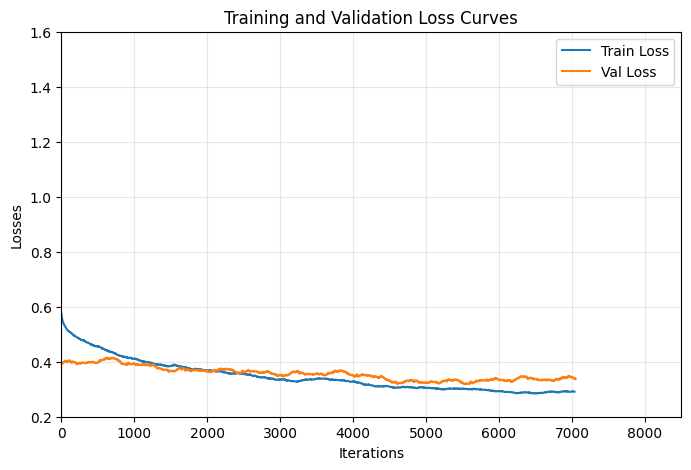

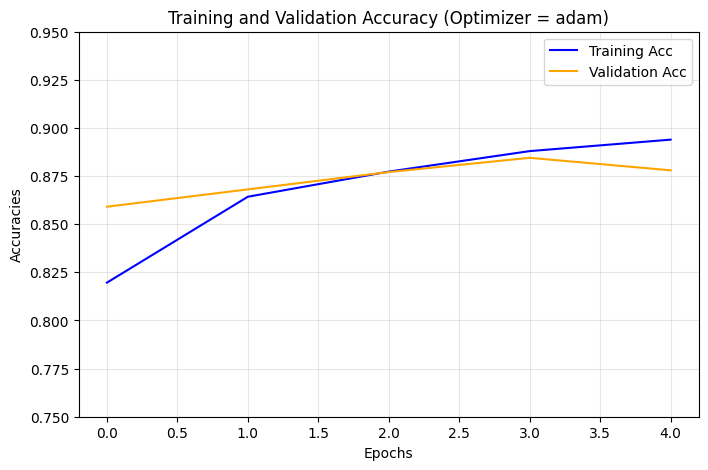

In [ ]:
# Optimizer with ADAM
optimizer_type = 'adam'

# Model
model = ThreeLayerNetwork(28 * 28, 500, 10).to(device)

# Criterion and optimizer
criterion = torch.nn.CrossEntropyLoss()
if optimizer_type == 'adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
elif optimizer_type == 'sgd':
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # can be addedd momentum for SGD

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=32, shuffle=False)

# Training
print(f"Running Experiment with Optimizer = {optimizer_type}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)


plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Optimizer = {optimizer_type})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()


Running Experiment with Optimizer = sgd


100%|██████████| 1563/1563 [00:21<00:00, 74.23it/s]


Epoch 1 - Train Loss: 0.5674, Val Loss: 0.4376, Train Acc: 0.8001, Val Acc: 0.8458


100%|██████████| 1563/1563 [00:20<00:00, 76.33it/s]


Epoch 2 - Train Loss: 0.4063, Val Loss: 0.3939, Train Acc: 0.8530, Val Acc: 0.8614


100%|██████████| 1563/1563 [00:20<00:00, 76.16it/s]


Epoch 3 - Train Loss: 0.3645, Val Loss: 0.3736, Train Acc: 0.8681, Val Acc: 0.8700


100%|██████████| 1563/1563 [00:21<00:00, 73.05it/s]


Epoch 4 - Train Loss: 0.3371, Val Loss: 0.3564, Train Acc: 0.8755, Val Acc: 0.8740


100%|██████████| 1563/1563 [00:21<00:00, 71.25it/s]


Epoch 5 - Train Loss: 0.3206, Val Loss: 0.3429, Train Acc: 0.8825, Val Acc: 0.8752


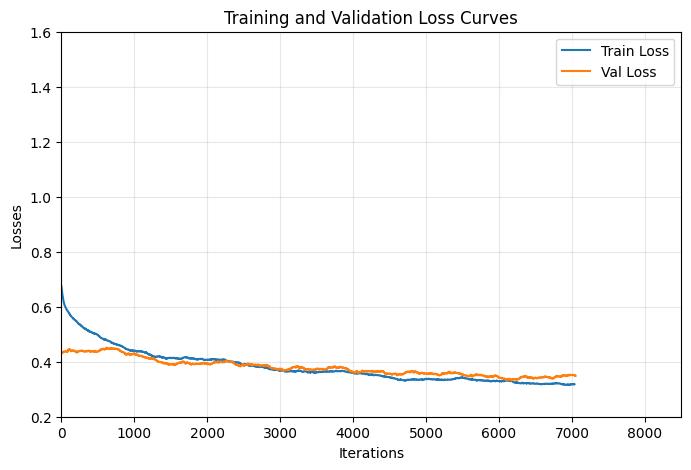

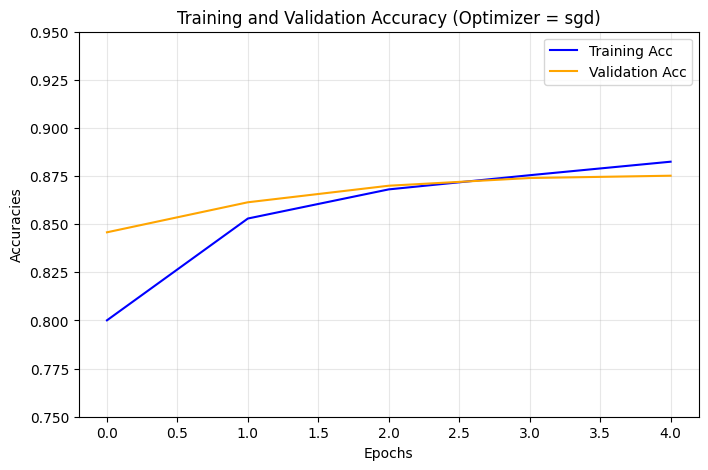

In [ ]:
# Optimizer with SGD
optimizer_type = 'sgd'

# Model
model = ThreeLayerNetwork(28 * 28, 500, 10).to(device)

# Criterion and optimizer
criterion = torch.nn.CrossEntropyLoss()
if optimizer_type == 'adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
elif optimizer_type == 'sgd':
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # momentum for SGD

# DataLoader
train_dataloader = DataLoader(fmnist_train, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(fmnist_val, batch_size=32, shuffle=False)

# Training
print(f"Running Experiment with Optimizer = {optimizer_type}")
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(5):  # 5 epoch
    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer)
    val_loss, val_preds, val_actuals = validate(valid_dataloader, model, criterion)
    val_acc = accuracy(val_preds, val_actuals)

    train_loss_list.extend(train_loss)
    val_loss_list.extend(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {np.mean(train_loss):.4f}, Val Loss: {np.mean(val_loss):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


plot_loss_graph([train_loss_list, val_loss_list], epoch_nr=5)

plt.figure(figsize=(8, 5))
plt.plot(range(5), train_acc_list, label='Training Acc', color='blue', linestyle='-')
plt.plot(range(5), val_acc_list, label='Validation Acc', color='orange', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title(f'Training and Validation Accuracy (Optimizer = {optimizer_type})')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 0.95)
plt.show()




We can see that in the ADAM, the training and validation loss curves are smoother and converge more quickly compared to SGD. Adam shows stable and consistent loss minimization, making it highly effective for faster convergence and smaller fluctuations in loss. Also, for the SGD, the training and validation loss curves are slightly noisier, especially in the earlier iterations, indicating a slower convergence rate. SGD takes longer to stabilize and shows marginally higher loss values, reflecting slower learning.
Training and Validation Accuracy:

For the accuracy part, Adam achieves slightly better training accuracy, showing its ability to adaptively tune learning rates for different parameters during optimization. The close gap between training and validation accuracy highlights good generalization without overfitting. Moreover, for the SGD, SGD produces slightly lower accuracies, which may indicate suboptimal optimization for this task with the current learning rate and momentum settings. Adam optimizer achieves faster convergence and lower loss values in fewer iterations compared to SGD. This is due to its adaptive learning rate mechanism, which adjusts weights dynamically. Actually, both optimizers achieve similar validation accuracy, indicating comparable generalization capabilities. However, Adam demonstrates slightly better performance with smoother loss curves and higher training accuracy. Adam is computationally more expensive than SGD but provides better optimization efficiency for this problem. SGD may require careful tuning of learning rates and momentum to match Adam's performance.

##GENERAL INTERPRETATIONS
We can make some general interpretations for general Analysis of hyperparameter adjustments. Throughout the experiments, we adjusted five key hyperparameters—hidden layer dimension, learning rate, batch size, criterion, and optimizer—and observed their effects on the model's performance in terms of training/validation loss, accuracy, and overall convergence behavior.

For the hidden layer, increasing the hidden layer size from 200 to 1000 showed improved training accuracy and smoother loss curves. While larger dimensions provided slightly better accuracy, the improvements plateaued after a certain point, reflecting diminishing returns. Larger dimensions also increased computational cost, highlighting a trade-off between performance and efficiency.

For the learning rate, I tested 0.01 and 0.0001. The higher learning rate led to faster convergence but introduced instability in the loss curves, while the lower learning rate provided stable and gradual learning with comparable accuracy. This highlights the need for a balanced learning rate to optimize convergence speed and stability.

For the Batch size, smaller batch sizes (16) resulted in noisier loss curves but marginally better generalization as evidenced by higher validation accuracy. Larger batch sizes (128) produced smoother loss curves and were computationally efficient but showed a slight reduction in generalization. This trade-off aligns with the theoretical advantages of small vs. large batch training.

Let's talk about the criterion (Loss Function). CrossEntropyLoss outperformed MSELoss for this classification task, as expected. CrossEntropyLoss minimized loss more effectively and provided smoother training. MSELoss, while achieving similar accuracy, introduced noise and was less efficient due to its unsuitability for classification.

Lastly, for the Optimizer part, Adam showed faster convergence and smoother loss curves compared to SGD. While both optimizers achieved comparable validation accuracy, Adam's adaptive learning rate mechanism enabled better performance with minimal tuning. SGD, on the other hand, required more iterations to stabilize and may benefit from further hyperparameter tuning.

In conclusion;
The experiments demonstrated the significant impact of hyperparameter selection on model performance. Balancing learning rate and batch size is crucial for efficient and stable training. CrossEntropyLoss and Adam optimizer are well-suited for classification tasks like Fashion-MNIST in this homework.

**Mehmet Ali Erkan**